### Load All Stations from Douglas Island to take a look, and do preliminary data cleaning

Notebook contents 
* load one WY at a time
* take a look at all variables

created by Cassie Lumbrazo\
last updated: March 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker
from matplotlib.patches import Rectangle

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [4]:
filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2024.txt'
# filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2025_until16March2025.txt'

# open
df = pd.read_csv(filename, sep = ",")

# make utc_valid a datetime and index the df by it 
df['datetime'] = pd.to_datetime(df['utc_valid'])
df = df.set_index('datetime')
df.head()

station            utc_valid  PAIRZZZ  PCIRZZZ  PPDRZZZ  \
datetime                                                                      
2023-10-01 00:00:00   ECEA2  2023-10-01 00:00:00      NaN      NaN      NaN   
2023-10-01 00:05:00   ECEA2  2023-10-01 00:05:00      NaN      NaN      NaN   
2023-10-01 00:10:00   ECEA2  2023-10-01 00:10:00      NaN      NaN      NaN   
2023-10-01 00:15:00   ECEA2  2023-10-01 00:15:00      NaN      NaN      NaN   
2023-10-01 00:20:00   ECEA2  2023-10-01 00:20:00      NaN      NaN      NaN   

                     PPIRZZZ  PPPRZZZ  PPVRZZZ  PTIRZZZ  PTPRZZZ  ...  \
datetime                                                          ...   
2023-10-01 00:00:00     0.01      NaN      NaN      NaN      NaN  ...   
2023-10-01 00:05:00     0.01      NaN      NaN      NaN      NaN  ...   
2023-10-01 00:10:00     0.01      NaN      NaN      NaN      NaN  ...   
2023-10-01 00:15:00     0.01      NaN      NaN      NaN      NaN  ...   
2023-10-01 00:20:00     0.01      NaN      NaN      NaN      NaN  ...   

                     USPRZZZ  VVIRZZZ  VVPRZZZ  XCIRZZZ  XCPRZZZ  XPPRZZZ  \
datetime                                                                    
2023-10-01 00:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2023-10-01 00:05:00      NaN      NaN      NaN      NaN      NaN      NaN   
2023-10-01 00:10:00      NaN      NaN      NaN      NaN      NaN      NaN   
2023-10-01 00:15:00      NaN      NaN      NaN      NaN      NaN      NaN   
2023-10-01 00:20:00      NaN      NaN      NaN      NaN      NaN      NaN   

                     XPQRZZZ  XRIRZZZ  XWIRZZZ  XWPRZZZ  
datetime                                                 
2023-10-01 00:00:00      NaN    100.0      NaN      NaN  
2023-10-01 00:05:00      NaN    100.0      NaN      NaN  
2023-10-01 00:10:00      NaN    100.0      NaN      NaN  
2023-10-01 00:15:00      NaN    100.0      NaN      NaN  
2023-10-01 00:20:00      NaN    100.0      NaN      NaN  

[5 rows x 37 columns]

In [5]:
df.station.unique()

array(['ECEA2', 'ECTA2', 'JECA2', 'NDIA2', 'PPSA2', 'SDIA2'], dtype=object)

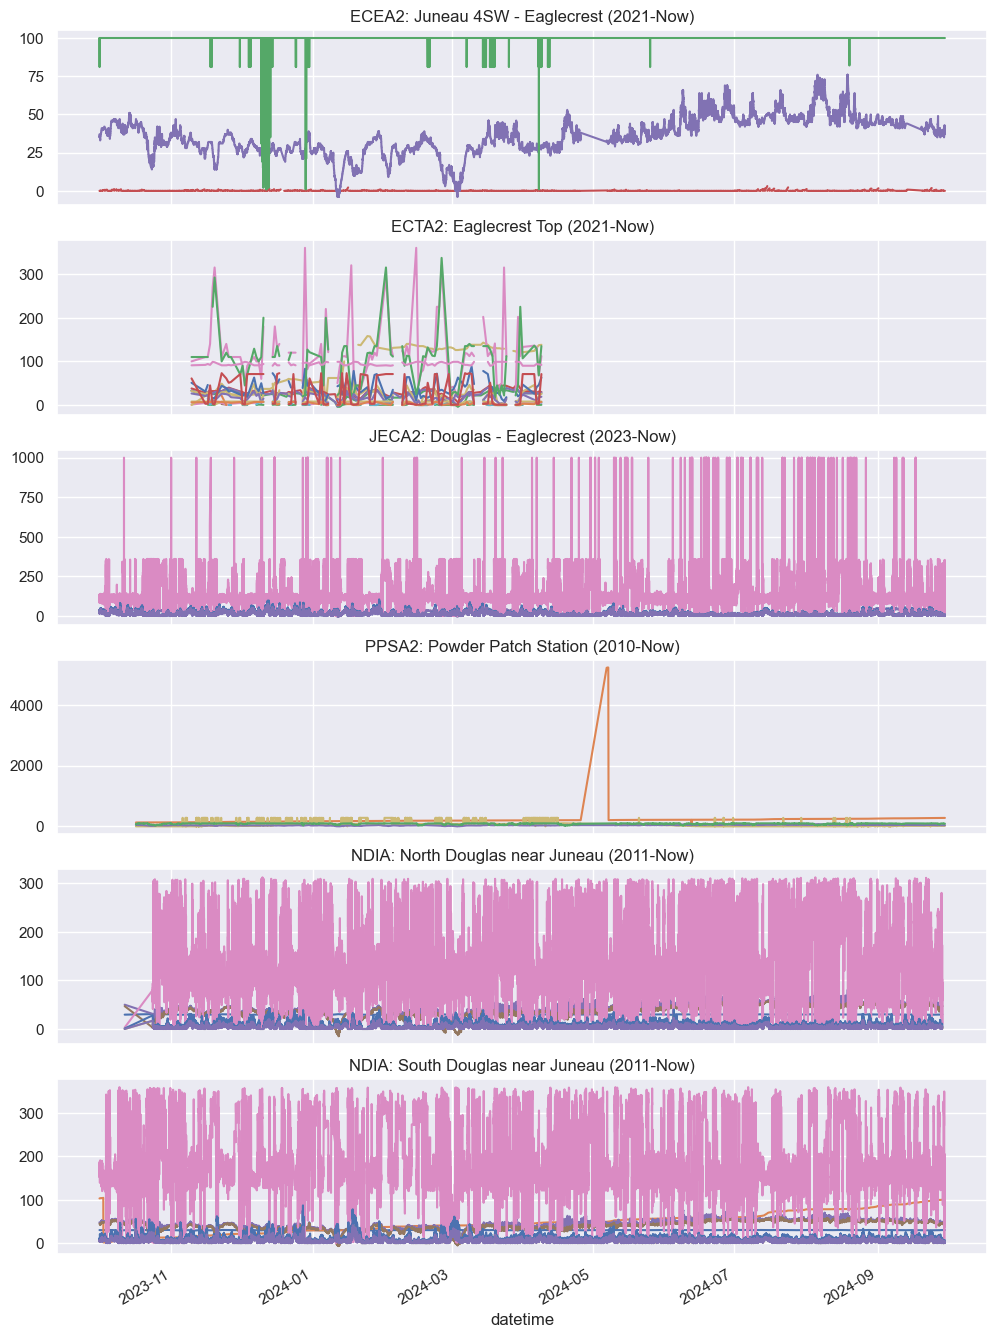

In [6]:
# so let's plot the data by station
fig, ax = plt.subplots(6,1, figsize=(12,18), sharex=True)

df.where(df['station'] == 'ECEA2').plot(ax=ax[0], label='ECEA2', legend=False)
df.where(df['station'] == 'ECTA2').plot(ax=ax[1], label='ECTA2', legend=False)
df.where(df['station'] == 'JECA2').plot(ax=ax[2], label='JECA2', legend=False)
df.where(df['station'] == 'PPSA2').plot(ax=ax[3], label='PPSA2', legend=False)
df.where(df['station'] == 'NDIA2').plot(ax=ax[4], label='NDIA2', legend=False)
df.where(df['station'] == 'SDIA2').plot(ax=ax[5], label='SDIA2', legend=False)

# add a title for each station name
ax[0].set_title('ECEA2: Juneau 4SW - Eaglecrest (2021-Now)')
ax[1].set_title('ECTA2: Eaglecrest Top (2021-Now)')
ax[2].set_title('JECA2: Douglas - Eaglecrest (2023-Now)')
ax[3].set_title('PPSA2: Powder Patch Station (2010-Now)')
ax[4].set_title('NDIA: North Douglas near Juneau (2011-Now)')
ax[5].set_title('NDIA: South Douglas near Juneau (2011-Now)')

plt.show()

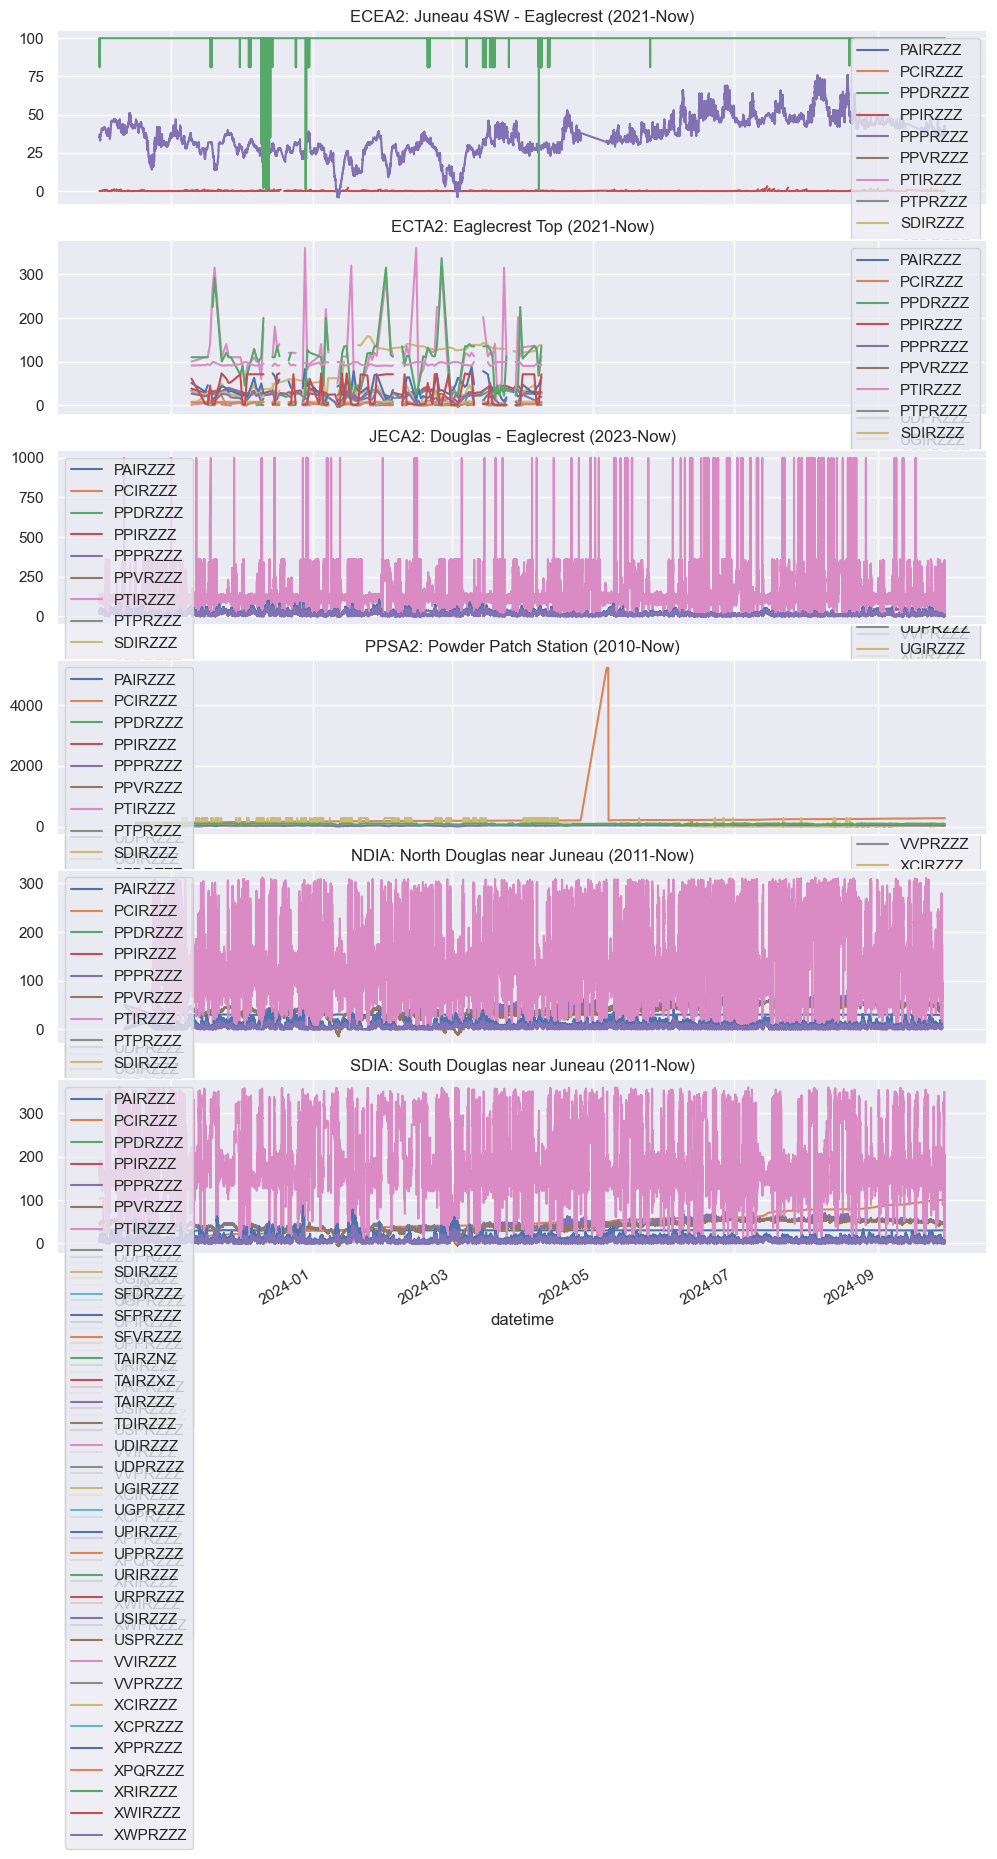

In [7]:
# so let's plot the data by station
fig, ax = plt.subplots(6,1, figsize=(12,18), sharex=True)

df.where(df['station'] == 'ECEA2').plot(ax=ax[0], label='ECEA2', legend=True)
df.where(df['station'] == 'ECTA2').plot(ax=ax[1], label='ECTA2', legend=True)
df.where(df['station'] == 'JECA2').plot(ax=ax[2], label='JECA2', legend=True)
df.where(df['station'] == 'PPSA2').plot(ax=ax[3], label='PPSA2', legend=True)
df.where(df['station'] == 'NDIA2').plot(ax=ax[4], label='NDIA2', legend=True)
df.where(df['station'] == 'SDIA2').plot(ax=ax[5], label='SDIA2', legend=True)

# add a title for each station name
ax[0].set_title('ECEA2: Juneau 4SW - Eaglecrest (2021-Now)')
ax[1].set_title('ECTA2: Eaglecrest Top (2021-Now)')
ax[2].set_title('JECA2: Douglas - Eaglecrest (2023-Now)')
ax[3].set_title('PPSA2: Powder Patch Station (2010-Now)')
ax[4].set_title('NDIA: North Douglas near Juneau (2011-Now)')
ax[5].set_title('SDIA: South Douglas near Juneau (2011-Now)')

plt.show()

Now, let's plot by variables and color by stations

In [8]:
df.columns

Index(['station', 'utc_valid', 'PAIRZZZ', 'PCIRZZZ', 'PPDRZZZ', 'PPIRZZZ',
       'PPPRZZZ', 'PPVRZZZ', 'PTIRZZZ', 'PTPRZZZ', 'SDIRZZZ', 'SFDRZZZ',
       'SFPRZZZ', 'SFVRZZZ', 'TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ', 'TDIRZZZ',
       'UDIRZZZ', 'UDPRZZZ', 'UGIRZZZ', 'UGPRZZZ', 'UPIRZZZ', 'UPPRZZZ',
       'URIRZZZ', 'URPRZZZ', 'USIRZZZ', 'USPRZZZ', 'VVIRZZZ', 'VVPRZZZ',
       'XCIRZZZ', 'XCPRZZZ', 'XPPRZZZ', 'XPQRZZZ', 'XRIRZZZ', 'XWIRZZZ',
       'XWPRZZZ'],
      dtype='object')

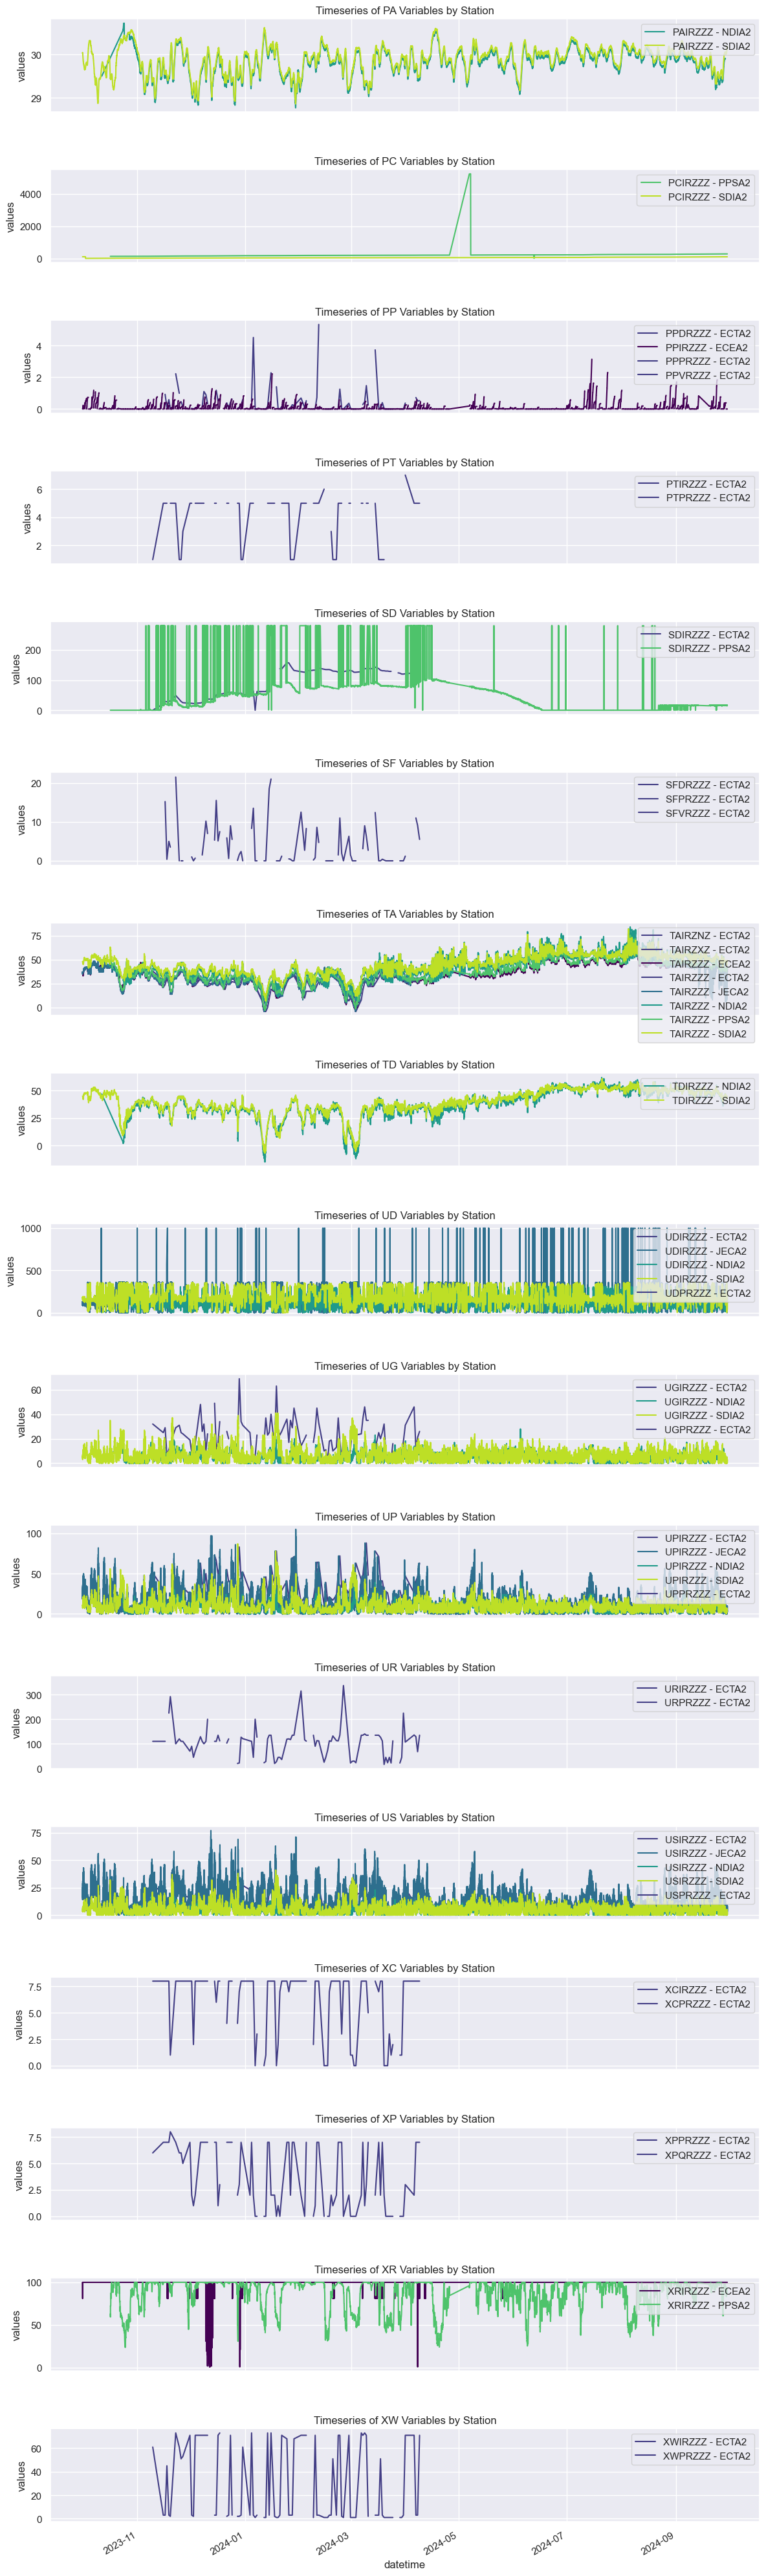

In [9]:
unique_stations = df['station'].unique()

# Create a color map for the unique stations
colors = plt.cm.viridis(np.linspace(0, 0.9, len(unique_stations)))
station_color_map = {station: color for station, color in zip(unique_stations, colors)}

# Create a figure with 14 subplots
fig, ax = plt.subplots(17, 1, figsize=(12, 40), sharex=True)

full_list_columns = [
'PAIRZZZ', # air pressure
'PCIRZZZ', # accumulated precip
'PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ', # precip
'PTIRZZZ', 'PTPRZZZ', # precip type 
'SDIRZZZ', # snow depth
'SFDRZZZ','SFPRZZZ', 'SFVRZZZ', #snow fall
'TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ', # air temp
'TDIRZZZ', # dew point temp
'UDIRZZZ', 'UDPRZZZ', # wind direction
'UGIRZZZ', 'UGPRZZZ', # wind gust at observation time
'UPIRZZZ', 'UPPRZZZ', # peak wind speed
'URIRZZZ', 'URPRZZZ', # peak wind direction associated with peak wind speed 
'USIRZZZ', 'USPRZZZ', # wind speed 
'VVIRZZZ', 'VVPRZZZ', # voltage
'XCIRZZZ', 'XCPRZZZ', # total sky cover  (XV: weather visibility)
'XPPRZZZ', 'XPQRZZZ', # past weather
'XRIRZZZ', # relative humidity
'XWIRZZZ','XWPRZZZ'] # present weather

# Define the variable groups based on their prefixes
variable_groups = {
    'PA': ['PAIRZZZ'], # air pressure
    'PC': ['PCIRZZZ'],
    'PP': ['PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ'], # precipitation (includes liquid amount of new snowfall)
    'PT': ['PTIRZZZ', 'PTPRZZZ'], # precipitation type (0 = none, 1 = rain, 2 = snow, 3 = freezing rain, 4 = ice pellets)
    'SD': ['SDIRZZZ'],
    'SF': ['SFDRZZZ', 'SFPRZZZ', 'SFVRZZZ'],
    'TA': ['TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ'],
    'TD': ['TDIRZZZ'],
    'UD': ['UDIRZZZ', 'UDPRZZZ'],
    'UG': ['UGIRZZZ', 'UGPRZZZ'],
    'UP': ['UPIRZZZ', 'UPPRZZZ'],
    'UR': ['URIRZZZ', 'URPRZZZ'],
    'US': ['USIRZZZ', 'USPRZZZ'],
    # 'V': ['VVIRZZZ', 'VVPRZZZ'], # voltage, not needed to plot anymore
    'XC': ['XCIRZZZ', 'XCPRZZZ'],
    'XP': ['XPPRZZZ', 'XPQRZZZ'],
    'XR': ['XRIRZZZ'],
    'XW': ['XWIRZZZ', 'XWPRZZZ']
}

# Loop through each group and plot the variables
for i, (prefix, variables) in enumerate(variable_groups.items()):
    for var in variables:
        for station in unique_stations:
            # Filter the DataFrame for the current station
            station_data = df[df['station'] == station]
            # Check if the variable exists in the station's data
            if var in station_data.columns and not station_data[var].isnull().all():
                # Plot the variable for the current station with the assigned color
                station_data[var].plot(ax=ax[i], label=f'{var} - {station}', color=station_color_map[station])
    
    # Set titles and labels for each subplot
    ax[i].set_title(f'Timeseries of {prefix} Variables by Station')
    ax[i].set_ylabel('values')
    ax[i].legend(loc='upper right')

# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')

plt.tight_layout()
plt.show()

Now, we only want to plot the variables we want to use for forcing, to get a better look and clean up. 

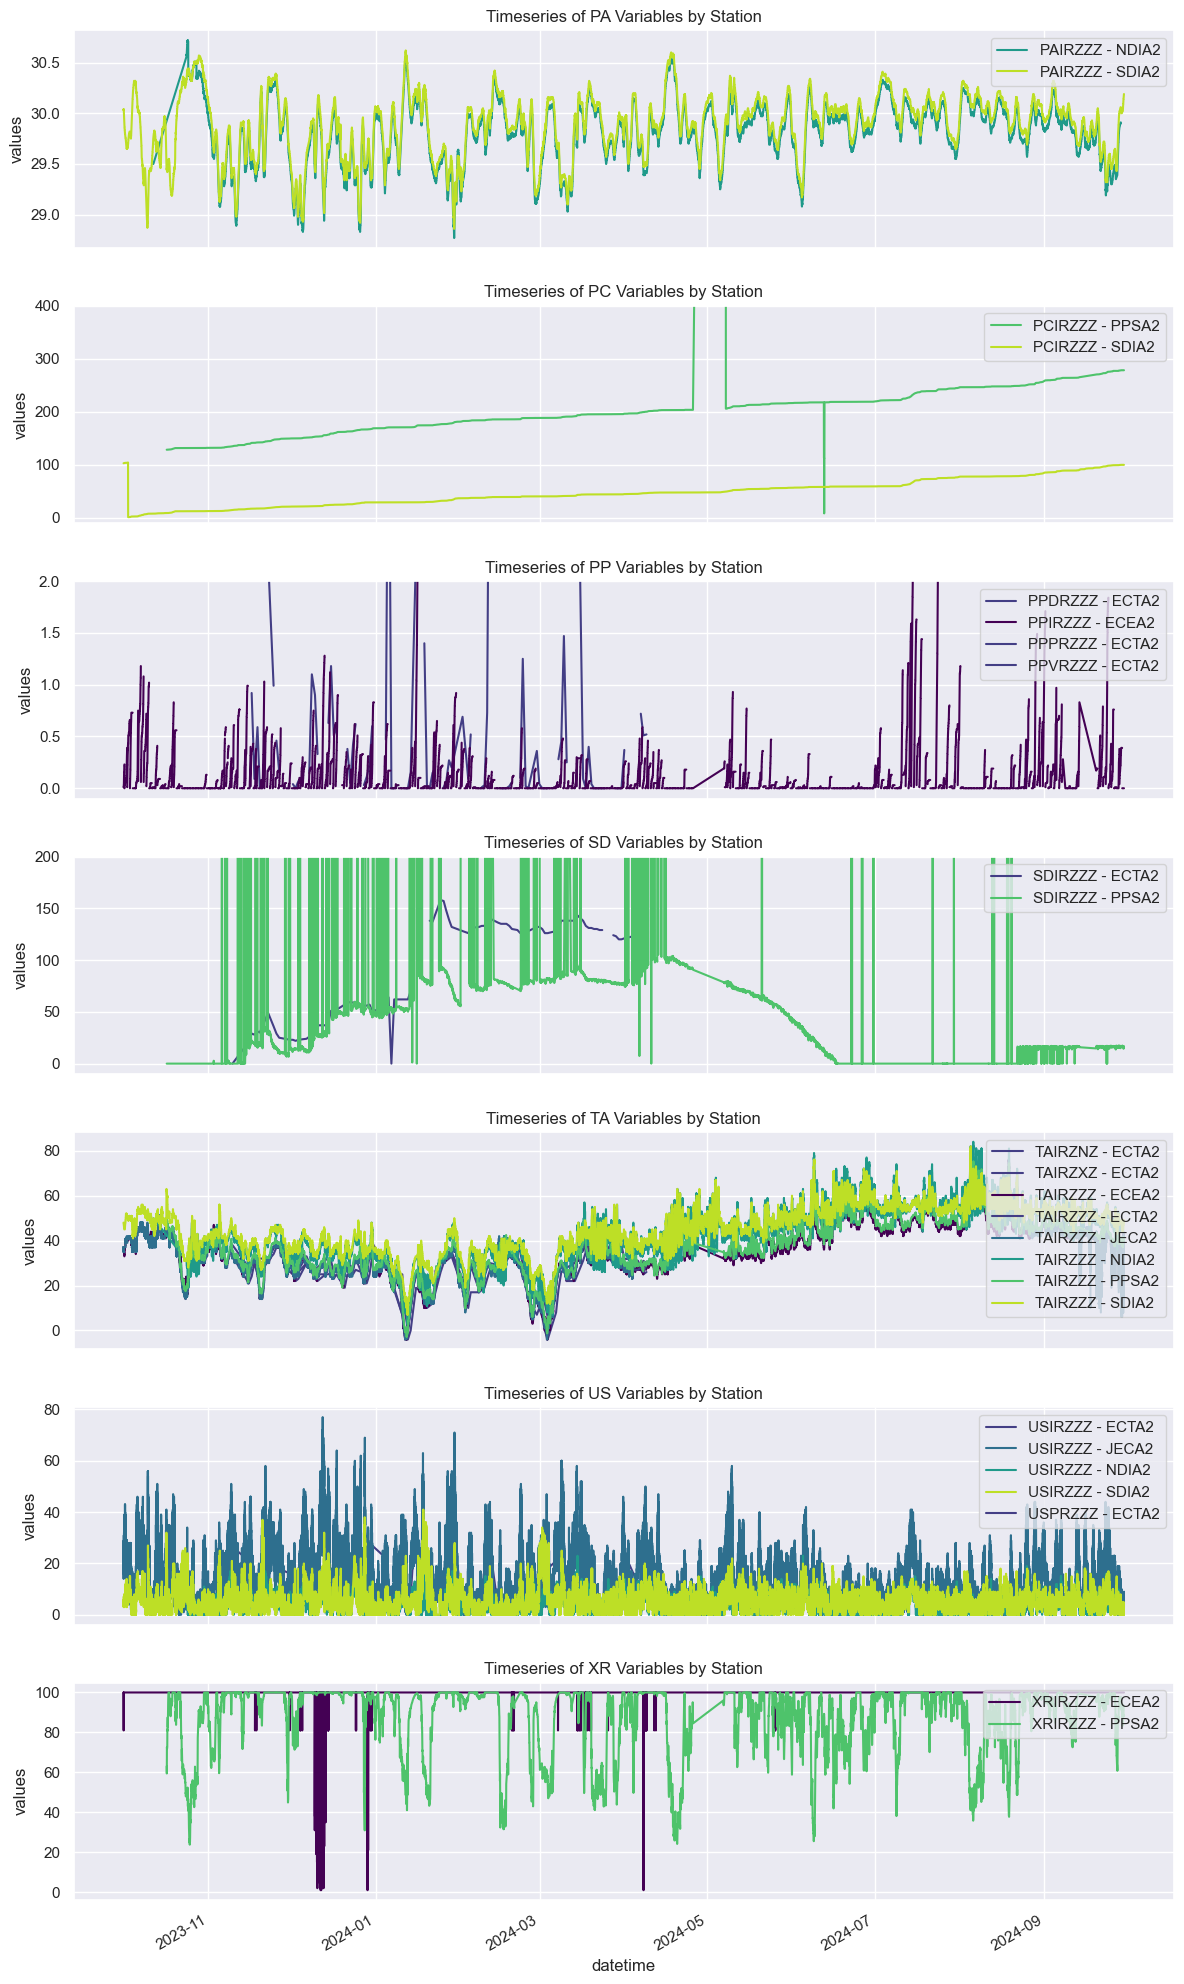

In [10]:
unique_stations = df['station'].unique()

# Create a color map for the unique stations
colors = plt.cm.viridis(np.linspace(0, 0.9, len(unique_stations)))
station_color_map = {station: color for station, color in zip(unique_stations, colors)}

# Create a figure with 14 subplots
fig, ax = plt.subplots(7, 1, figsize=(12, 20), sharex=True)

# Define the variable groups based on their prefixes
variable_groups = {
    'PA': ['PAIRZZZ'], # air pressure
    'PC': ['PCIRZZZ'],
    'PP': ['PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ'], # precipitation (includes liquid amount of new snowfall)
    # 'PT': ['PTIRZZZ', 'PTPRZZZ'], # precipitation type (0 = none, 1 = rain, 2 = snow, 3 = freezing rain, 4 = ice pellets)
    'SD': ['SDIRZZZ'],
    # 'SF': ['SFDRZZZ', 'SFPRZZZ', 'SFVRZZZ'],
    'TA': ['TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ'],
    # 'TD': ['TDIRZZZ'],
    # 'UD': ['UDIRZZZ', 'UDPRZZZ'],
    # 'UG': ['UGIRZZZ', 'UGPRZZZ'],
    # 'UP': ['UPIRZZZ', 'UPPRZZZ'],
    # 'UR': ['URIRZZZ', 'URPRZZZ'],
    'US': ['USIRZZZ', 'USPRZZZ'],
    # 'V': ['VVIRZZZ', 'VVPRZZZ'], # voltage, not needed to plot anymore
    # 'XC': ['XCIRZZZ', 'XCPRZZZ'],
    # 'XP': ['XPPRZZZ', 'XPQRZZZ'],
    'XR': ['XRIRZZZ'],
    # 'XW': ['XWIRZZZ', 'XWPRZZZ']
}

# Loop through each group and plot the variables
for i, (prefix, variables) in enumerate(variable_groups.items()):
    for var in variables:
        for station in unique_stations:
            # Filter the DataFrame for the current station
            station_data = df[df['station'] == station]
            # Check if the variable exists in the station's data
            if var in station_data.columns and not station_data[var].isnull().all():
                # Plot the variable for the current station with the assigned color
                station_data[var].plot(ax=ax[i], label=f'{var} - {station}', color=station_color_map[station])
    
    # Set titles and labels for each subplot
    ax[i].set_title(f'Timeseries of {prefix} Variables by Station')
    ax[i].set_ylabel('values')
    ax[i].legend(loc='upper right')

# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')

# just limit the yaxis of a few of the graphs for viewing
ax[1].set_ylim(-10, 400)
ax[2].set_ylim(-0.1, 2)
ax[3].set_ylim(-10, 200)

plt.tight_layout()
plt.show()

### Lets go one variable at a time, to, 
* plot on it's own 
* investigate the quality of the dataset (looking for gaps, outliers, etc)
* determine the level of cleaning needed
* and finally, put everything in the sample temporal resolution to compare stations

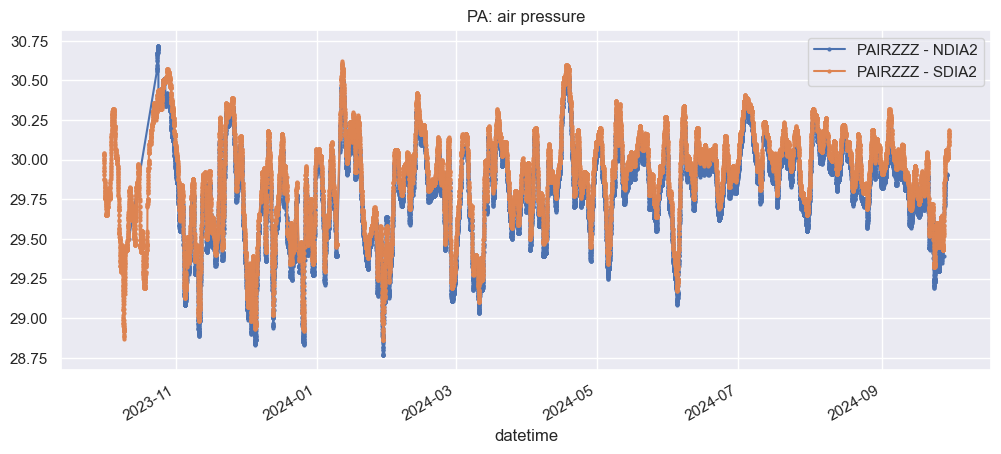

In [11]:
# plot a single variable at a time 
plt.figure(figsize=(12,5))
df['PAIRZZZ'].where(df['station'] == 'NDIA2').plot(marker='o', markersize=2, label='PAIRZZZ - NDIA2')
df['PAIRZZZ'].where(df['station'] == 'SDIA2').plot(marker='o', markersize=2, label='PAIRZZZ - SDIA2')

plt.title('PA: air pressure')
plt.legend(loc='upper right')

# start_date = '2024-01-04'
# end_date = '2024-01-8'
# plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
# plt.ylim(169, 171)

plt.show()

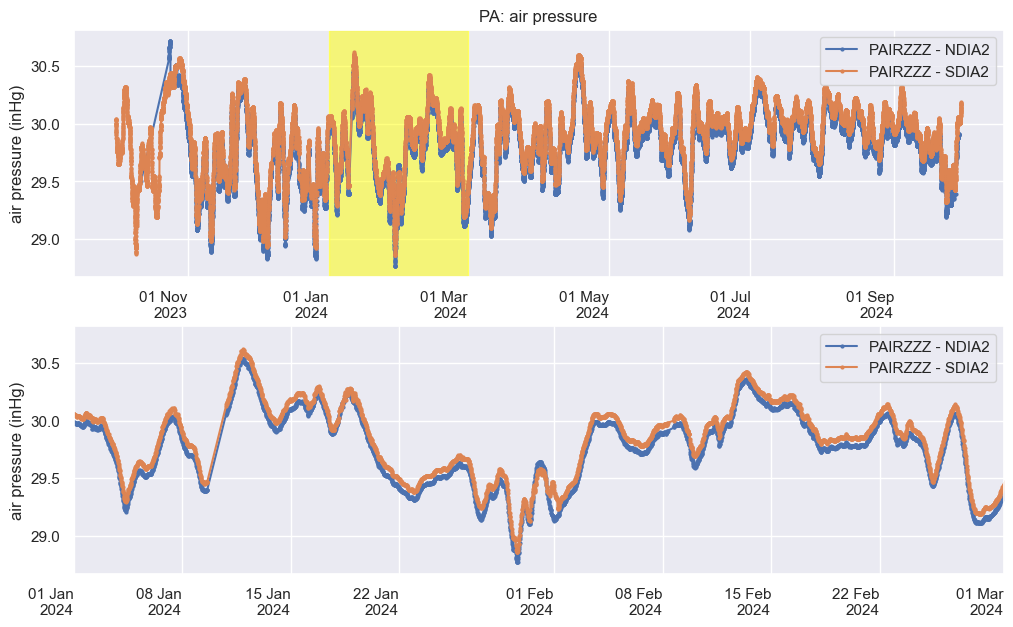

In [12]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
df['PAIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='PAIRZZZ - NDIA2')
df['PAIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='PAIRZZZ - SDIA2')

df['PAIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[1], marker='o', markersize=2, label='PAIRZZZ - NDIA2')
df['PAIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[1], marker='o', markersize=2, label='PAIRZZZ - SDIA2')

# set titles and labels 
ax[0].set_title('PA: air pressure')
ax[0].set_ylabel('air pressure (inHg)')
ax[1].set_ylabel('air pressure (inHg)')

# zoom in the bottom plot
# start_date = '2024-01-06'
# end_date = '2024-01-08'
start_date = '2024-01-01'
end_date = '2024-03-01'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


The data looks super clean and does not need to be changed really... 

Let's resample the temporal resolution to hourly and then plot that in a third subplot. 

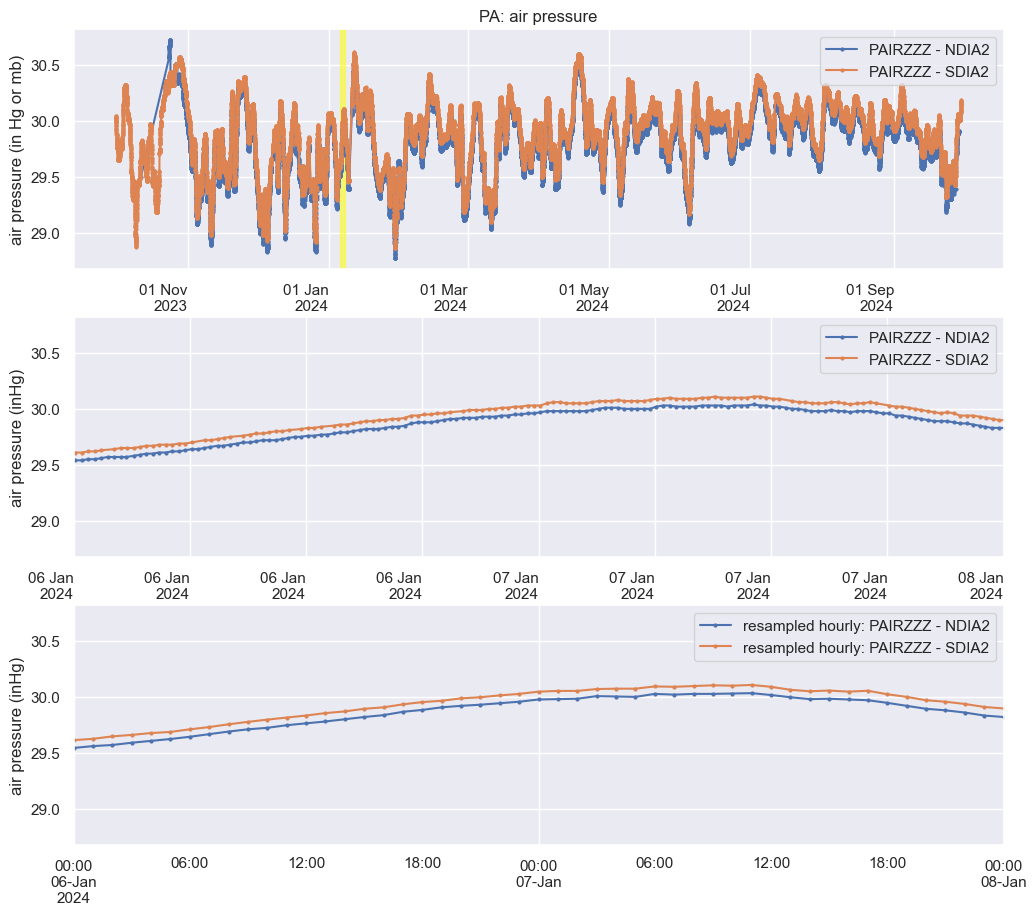

In [13]:
fig, ax = plt.subplots(3,1, figsize=(12,12), sharex=False, sharey=True)
df['PAIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='PAIRZZZ - NDIA2')
df['PAIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='PAIRZZZ - SDIA2')

df['PAIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[1], marker='o', markersize=2, label='PAIRZZZ - NDIA2')
df['PAIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[1], marker='o', markersize=2, label='PAIRZZZ - SDIA2')

df['PAIRZZZ'].where(df['station'] == 'NDIA2').resample('h').mean().plot(ax=ax[2], marker='o', markersize=2, label='resampled hourly: PAIRZZZ - NDIA2')
df['PAIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[2], marker='o', markersize=2, label='resampled hourly: PAIRZZZ - SDIA2')

# set titles and labels 
ax[0].set_title('PA: air pressure')
ax[0].set_ylabel('air pressure (in Hg or mb)')
ax[1].set_ylabel('air pressure (inHg)')
ax[2].set_ylabel('air pressure (inHg)')

# zoom in the bottom plot
start_date = '2024-01-06'
end_date = '2024-01-08'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[2].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date)) # make the third subplot match the second

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)
# ax[2].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


PC: accumulation precipiation 

In [14]:
# very rough clean for the figure, just drop any values from PCIRZZZ which are above 1000
df['PCIRZZZ'] = df['PCIRZZZ'].where(df['PCIRZZZ'] < 1000)

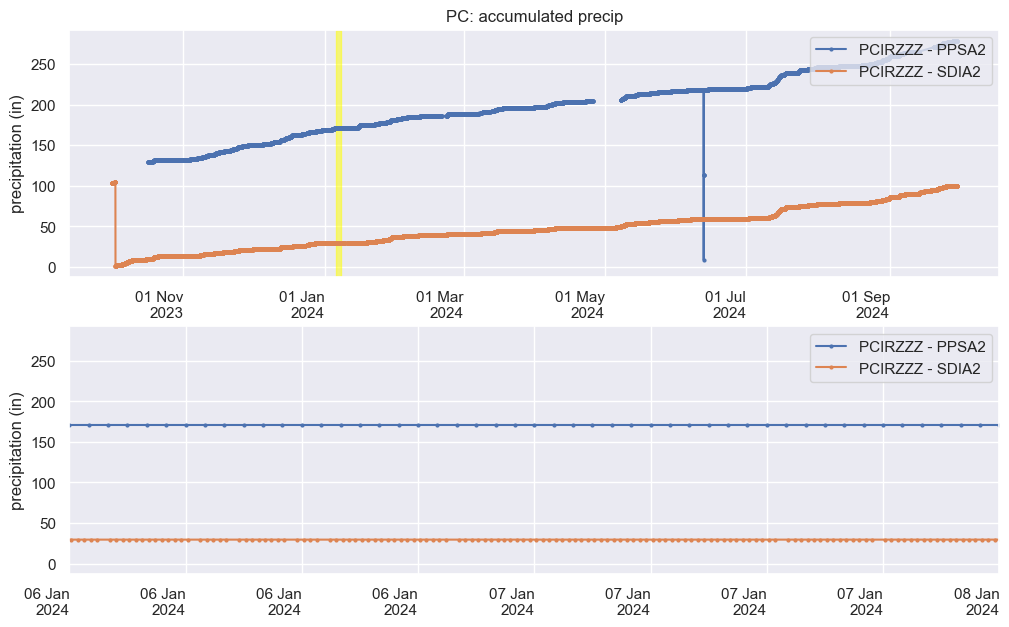

In [15]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
df['PCIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - PPSA2')
df['PCIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - SDIA2')

df['PCIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[1], marker='o', markersize=2, label='PCIRZZZ - PPSA2')
df['PCIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[1], marker='o', markersize=2, label='PCIRZZZ - SDIA2')

# set titles and labels 
ax[0].set_title('PC: accumulated precip')
ax[0].set_ylabel('precipitation (in)')
ax[1].set_ylabel('precipitation (in)')

# zoom in the bottom plot
# start_date = '2024-01-01'
# end_date = '2024-03-01'
start_date = '2024-01-06'
end_date = '2024-01-08'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


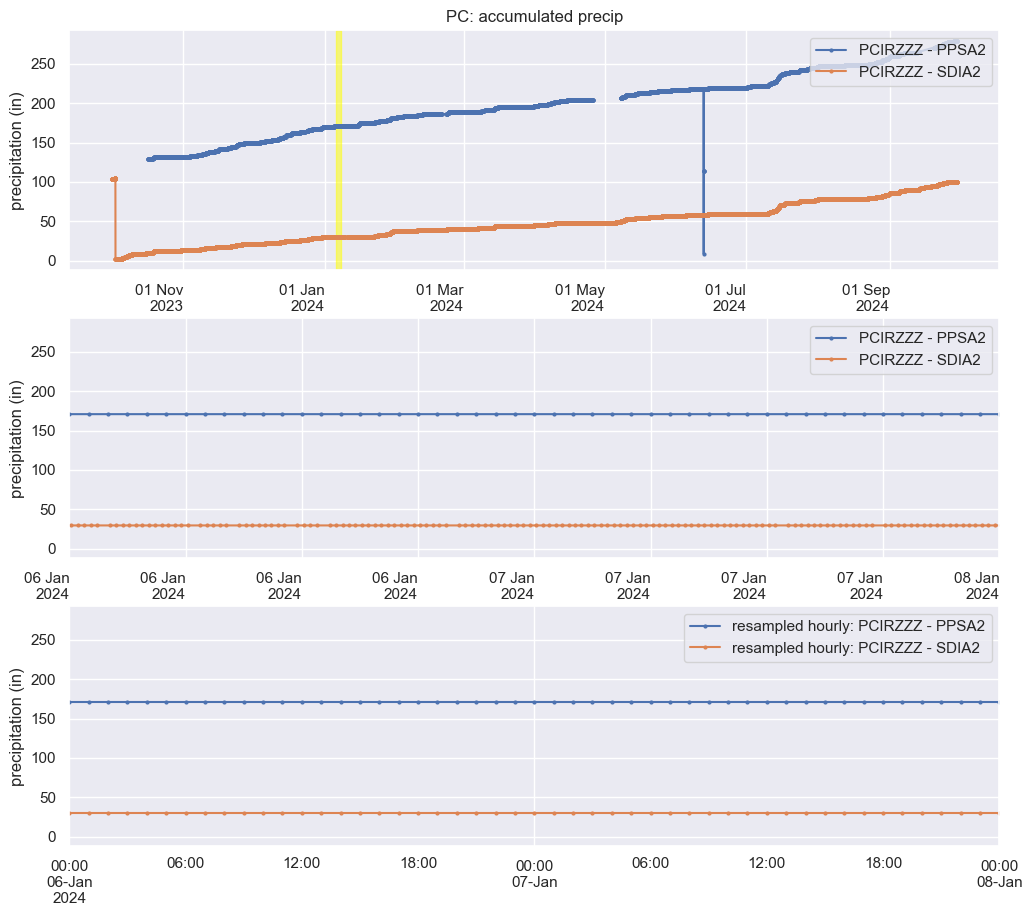

In [16]:
fig, ax = plt.subplots(3,1, figsize=(12,12), sharex=False, sharey=True)

df['PCIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - PPSA2')
df['PCIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='PCIRZZZ - SDIA2')

df['PCIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[1], marker='o', markersize=2, label='PCIRZZZ - PPSA2')
df['PCIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[1], marker='o', markersize=2, label='PCIRZZZ - SDIA2')

df['PCIRZZZ'].where(df['station'] == 'PPSA2').resample('h').mean().plot(ax=ax[2], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - PPSA2')
df['PCIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[2], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - SDIA2')

# set titles and labels 
ax[0].set_title('PC: accumulated precip')
ax[0].set_ylabel('precipitation (in)')
ax[1].set_ylabel('precipitation (in)')
ax[2].set_ylabel('precipitation (in)')

# zoom in the bottom plot
start_date = '2024-01-06'
end_date = '2024-01-08'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[2].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date)) # make the third subplot match the second

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)
# ax[2].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


For now, I am going to move on to the other variables.

PP: precipiation 

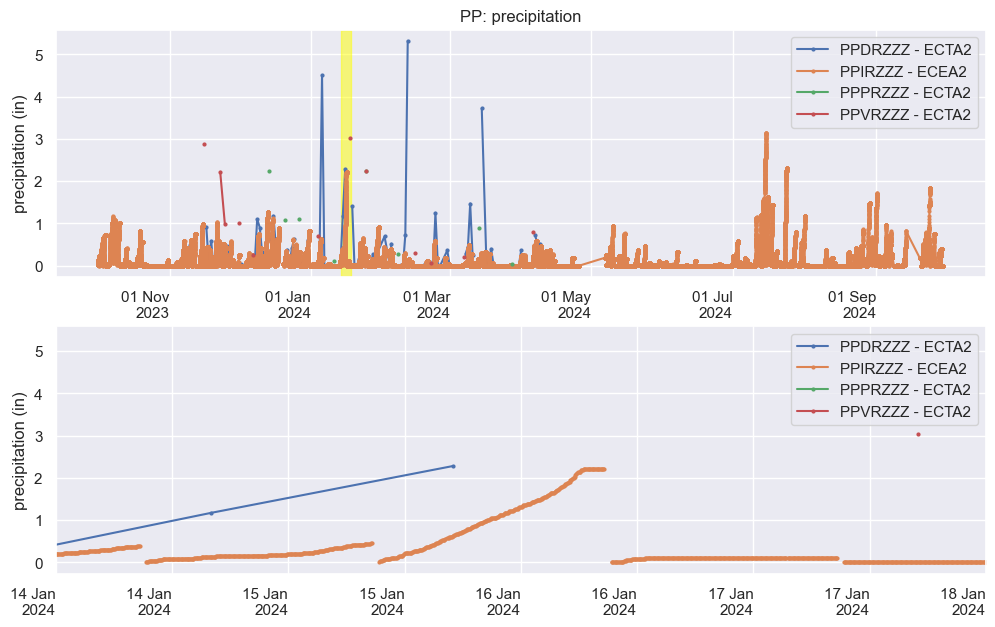

In [17]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)
df['PPDRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='PPDRZZZ - ECTA2')
df['PPIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[0], marker='o', markersize=2, label='PPIRZZZ - ECEA2')
df['PPPRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='PPPRZZZ - ECTA2')
df['PPVRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='PPVRZZZ - ECTA2')

df['PPDRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='PPDRZZZ - ECTA2')
df['PPIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[1], marker='o', markersize=2, label='PPIRZZZ - ECEA2')
df['PPPRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='PPPRZZZ - ECTA2')
df['PPVRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='PPVRZZZ - ECTA2')

# set titles and labels 
ax[0].set_title('PP: precipitation')
ax[0].set_ylabel('precipitation (in)')
ax[1].set_ylabel('precipitation (in)')

# zoom in the bottom plot
# start_date = '2024-01-01'
# end_date = '2024-03-01'
start_date = '2024-01-14'
end_date = '2024-01-18'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


Snow depth

In [18]:
# very light cleaning of snow depth just for plotting, remove all values above 200
df['SDIRZZZ'] = df['SDIRZZZ'].where(df['SDIRZZZ'] < 200)

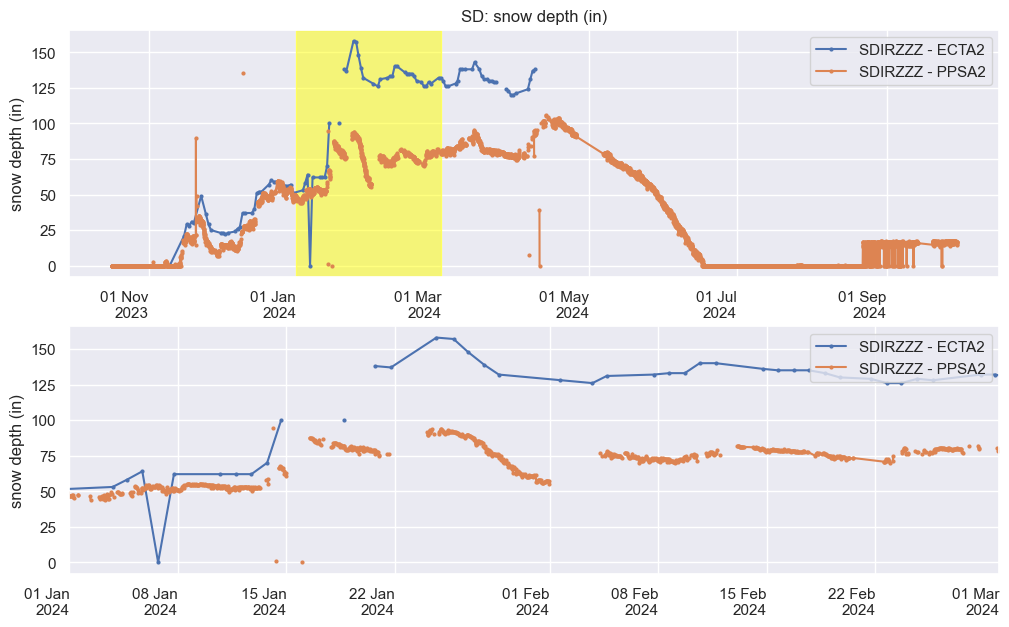

In [19]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
df['SDIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - ECTA2')
df['SDIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - PPSA2')

df['SDIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - ECTA2')
df['SDIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - PPSA2')

# set titles and labels 
ax[0].set_title('SD: snow depth (in)')
ax[0].set_ylabel('snow depth (in)')
ax[1].set_ylabel('snow depth (in)')

# zoom in the bottom plot
start_date = '2024-01-01'
end_date = '2024-03-01'
# start_date = '2024-01-06'
# end_date = '2024-01-08'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


TA: air temperature

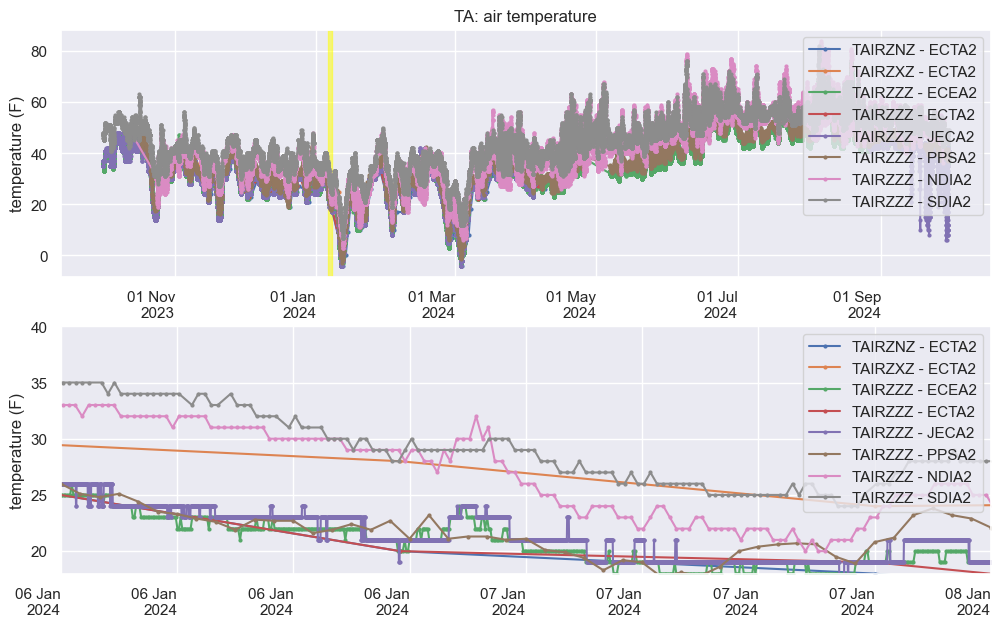

In [20]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)

df['TAIRZNZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZNZ - ECTA2')
df['TAIRZXZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZXZ - ECTA2')

df['TAIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - ECEA2')
df['TAIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - ECTA2')
df['TAIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - JECA2')
df['TAIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - PPSA2')
df['TAIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - NDIA2')
df['TAIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - SDIA2')

df['TAIRZNZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZNZ - ECTA2')
df['TAIRZXZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZXZ - ECTA2')

df['TAIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZZZ - ECEA2')
df['TAIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZZZ - ECTA2')
df['TAIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZZZ - JECA2')
df['TAIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZZZ - PPSA2')
df['TAIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZZZ - NDIA2')
df['TAIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZZZ - SDIA2')


# set titles and labels 
ax[0].set_title('TA: air temperature')
ax[0].set_ylabel('temperature (F)')
ax[1].set_ylabel('temperature (F)')
ax[1].set_ylim(18, 40) # zooming into the temperatures on the second subplot to see the differences better

# zoom in the bottom plot
# start_date = '2024-01-01'
# end_date = '2024-03-01'
start_date = '2024-01-06'
end_date = '2024-01-08'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


Now, make the same figure but the subplot 2 in the top, and a resampled version in the second location

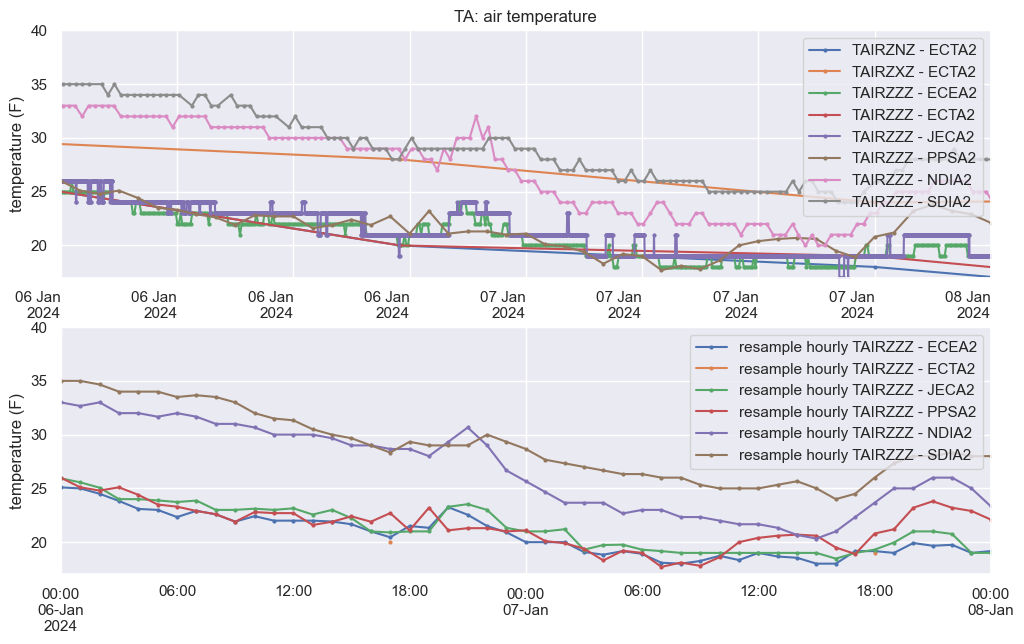

In [21]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)

df['TAIRZNZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZNZ - ECTA2')
df['TAIRZXZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZXZ - ECTA2')

df['TAIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - ECEA2')
df['TAIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - ECTA2')
df['TAIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - JECA2')
df['TAIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - PPSA2')
df['TAIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - NDIA2')
df['TAIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='TAIRZZZ - SDIA2')

# df['TAIRZNZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZNZ - ECTA2') # removing these two since they are daily and such
# df['TAIRZXZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='TAIRZXZ - ECTA2')

df['TAIRZZZ'].where(df['station'] == 'ECEA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resample hourly TAIRZZZ - ECEA2')
df['TAIRZZZ'].where(df['station'] == 'ECTA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resample hourly TAIRZZZ - ECTA2')
df['TAIRZZZ'].where(df['station'] == 'JECA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resample hourly TAIRZZZ - JECA2')
df['TAIRZZZ'].where(df['station'] == 'PPSA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resample hourly TAIRZZZ - PPSA2')
df['TAIRZZZ'].where(df['station'] == 'NDIA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resample hourly TAIRZZZ - NDIA2')
df['TAIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resample hourly TAIRZZZ - SDIA2')


# set titles and labels 
ax[0].set_title('TA: air temperature')
ax[0].set_ylabel('temperature (F)')
ax[1].set_ylabel('temperature (F)')
ax[0].set_ylim(17, 40) # zooming into the temperatures on the second subplot to see the differences better
ax[1].set_ylim(17, 40) # zooming into the temperatures on the second subplot to see the differences better

# zoom in the bottom plot
# start_date = '2024-01-01'
# end_date = '2024-03-01'
start_date = '2024-01-06'
end_date = '2024-01-08'
ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date)) # also making the top subplot a smaller figure to see all the temperatures more clearly
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
# ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)


plt.show()


US: wind speed 

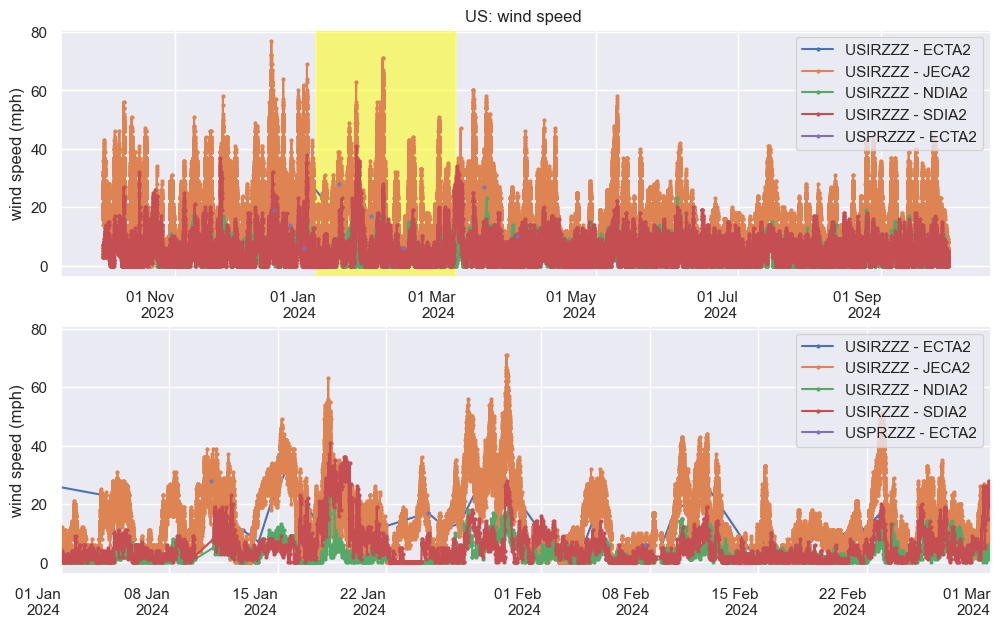

In [22]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)

df['USIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - ECTA2')
df['USIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - JECA2')
df['USIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - NDIA2')
df['USIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - SDIA2')
df['USPRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='USPRZZZ - ECTA2')

df['USIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - ECTA2')
df['USIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - JECA2')
df['USIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - NDIA2')
df['USIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - SDIA2')
df['USPRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='USPRZZZ - ECTA2')


# set titles and labels 
ax[0].set_title('US: wind speed ')
ax[0].set_ylabel('wind speed (mph)')
ax[1].set_ylabel('wind speed (mph)')
# ax[1].set_ylim(18, 40) # zooming into the temperatures on the second subplot to see the differences better

# zoom in the bottom plot
start_date = '2024-01-01'
end_date = '2024-03-01'

# start_date = '2024-01-14'
# end_date = '2024-01-17'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


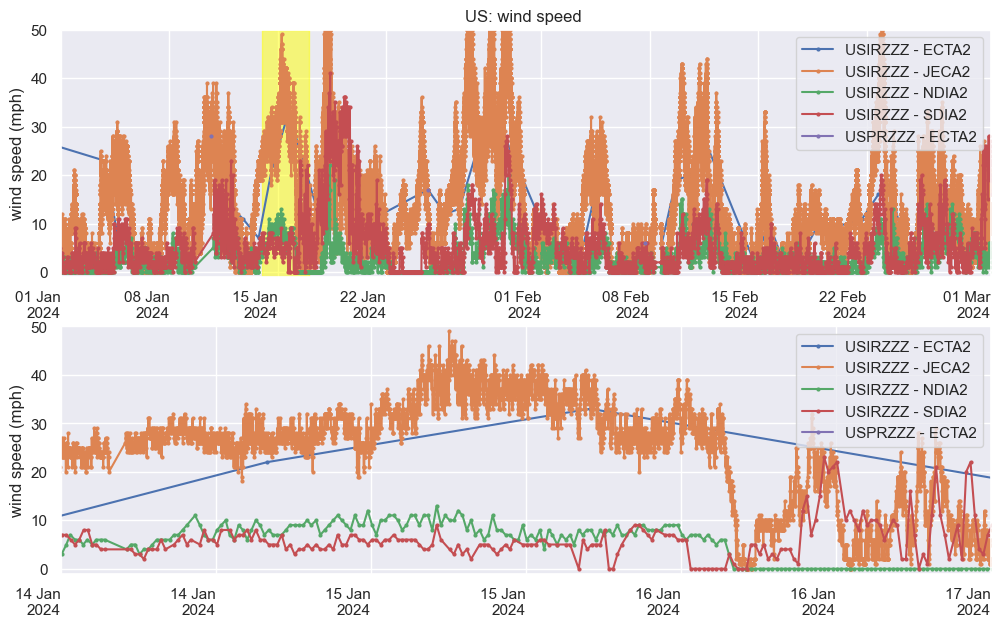

In [23]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)

df['USIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - ECTA2')
df['USIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - JECA2')
df['USIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - NDIA2')
df['USIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - SDIA2')
df['USPRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='USPRZZZ - ECTA2')

df['USIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - ECTA2')
df['USIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - JECA2')
df['USIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - NDIA2')
df['USIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[1], marker='o', markersize=2, label='USIRZZZ - SDIA2')
df['USPRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='USPRZZZ - ECTA2')


# set titles and labels 
ax[0].set_title('US: wind speed ')
ax[0].set_ylabel('wind speed (mph)')
ax[1].set_ylabel('wind speed (mph)')

# zoom in the bottom plot
start_date = '2024-01-01'
end_date = '2024-03-01'
ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[0].set_ylim(-1, 50) 

start_date = '2024-01-14'
end_date = '2024-01-17'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[1].set_ylim(-1, 50) 

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


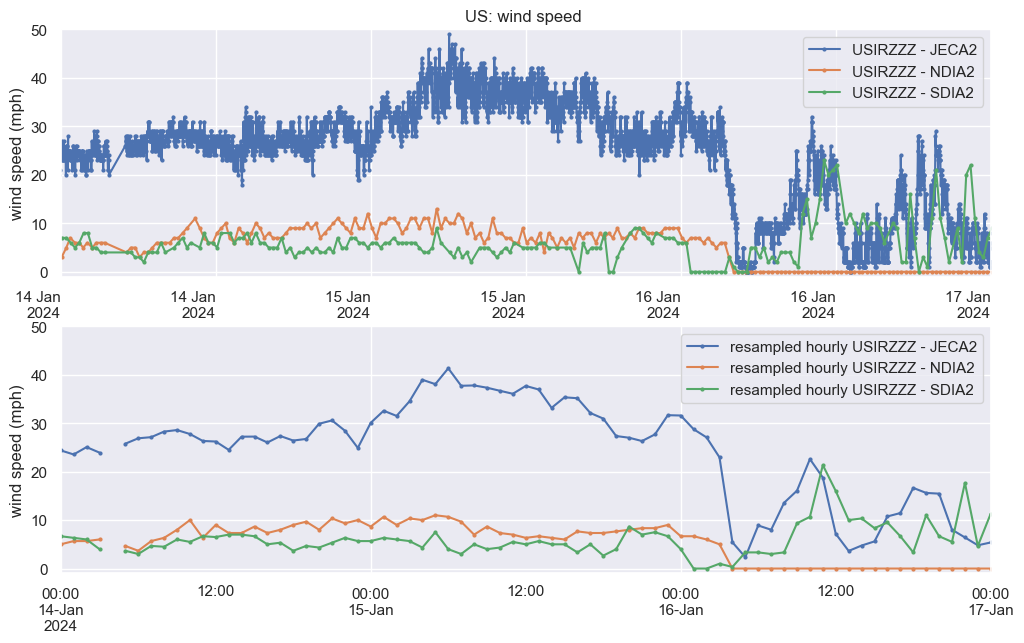

In [24]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)

# df['USIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - ECTA2') # this is daily or something so comment out
df['USIRZZZ'].where(df['station'] == 'JECA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - JECA2')
df['USIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - NDIA2')
df['USIRZZZ'].where(df['station'] == 'SDIA2').plot(ax=ax[0], marker='o', markersize=2, label='USIRZZZ - SDIA2')
# df['USPRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='USPRZZZ - ECTA2') # and this data is not showing up at all, so comment out

# df['USIRZZZ'].where(df['station'] == 'ECTA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly USIRZZZ - ECTA2')
df['USIRZZZ'].where(df['station'] == 'JECA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly USIRZZZ - JECA2')
df['USIRZZZ'].where(df['station'] == 'NDIA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly USIRZZZ - NDIA2')
df['USIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly USIRZZZ - SDIA2')
# df['USPRZZZ'].where(df['station'] == 'ECTA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly USPRZZZ - ECTA2')


# set titles and labels 
ax[0].set_title('US: wind speed ')
ax[0].set_ylabel('wind speed (mph)')
ax[1].set_ylabel('wind speed (mph)')

# zoom in the bottom plot
start_date = '2024-01-14'
end_date = '2024-01-17'
ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[0].set_ylim(-1, 50) 

start_date = '2024-01-14'
end_date = '2024-01-17'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[1].set_ylim(-1, 50) 

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
# ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

plt.show()


XR: Relative Humidity 

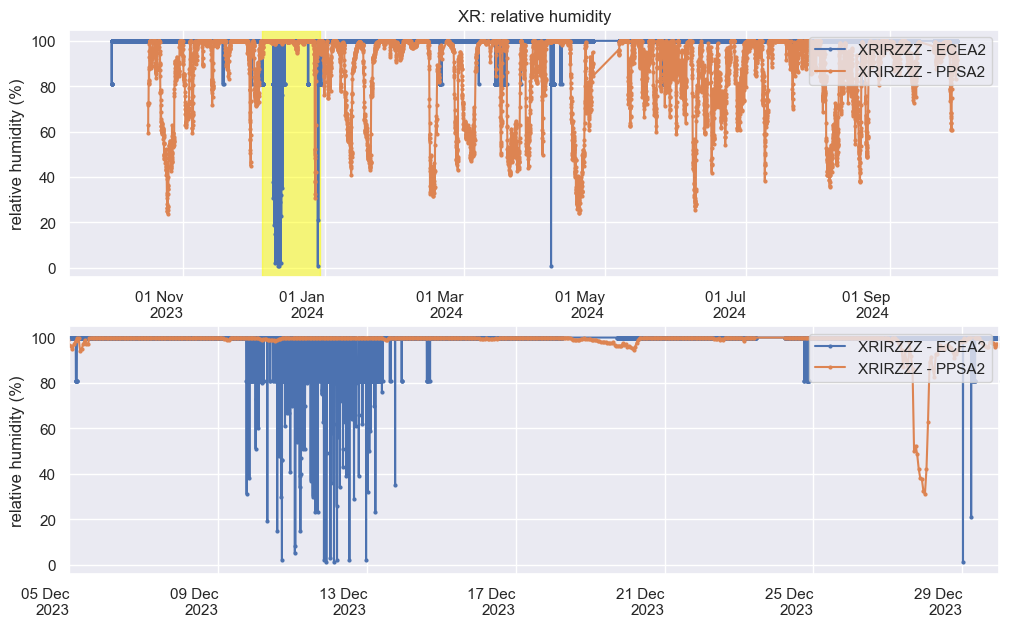

In [25]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
df['XRIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[0], marker='o', markersize=2, label='XRIRZZZ - ECEA2')
df['XRIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='XRIRZZZ - PPSA2')

df['XRIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[1], marker='o', markersize=2, label='XRIRZZZ - ECEA2')
df['XRIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[1], marker='o', markersize=2, label='XRIRZZZ - PPSA2')

# set titles and labels 
ax[0].set_title('XR: relative humidity')
ax[0].set_ylabel('relative humidity (%)')
ax[1].set_ylabel('relative humidity (%)')

# zoom in the bottom plot
# start_date = '2024-01-01'
# end_date = '2024-03-01'
start_date = '2023-12-05'
end_date = '2023-12-30'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.5))

# # add a legend for the highlighted region
# highlight = Rectangle((0, 0), 1, 1, color='grey', alpha=0.5, label='region in subplot 2')
# ax[0].legend(handles=[highlight], loc='upper right')
# --------------------------------------------------------------------------------------------

plt.show()


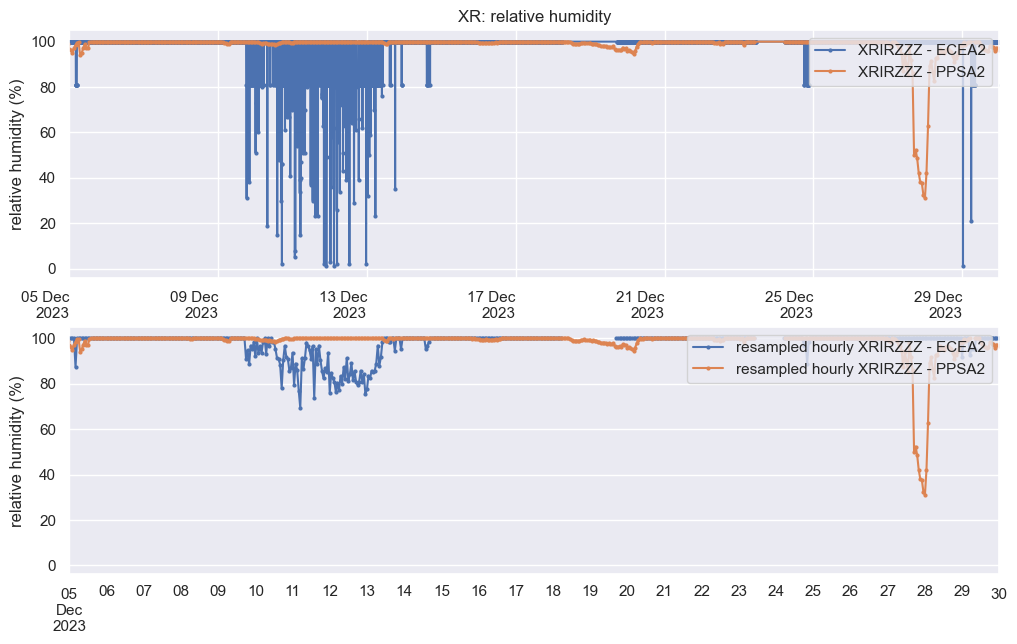

In [26]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
df['XRIRZZZ'].where(df['station'] == 'ECEA2').plot(ax=ax[0], marker='o', markersize=2, label='XRIRZZZ - ECEA2')
df['XRIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='XRIRZZZ - PPSA2')

df['XRIRZZZ'].where(df['station'] == 'ECEA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly XRIRZZZ - ECEA2')
df['XRIRZZZ'].where(df['station'] == 'PPSA2').resample('h').mean().plot(ax=ax[1], marker='o', markersize=2, label='resampled hourly XRIRZZZ - PPSA2')

# set titles and labels 
ax[0].set_title('XR: relative humidity')
ax[0].set_ylabel('relative humidity (%)')
ax[1].set_ylabel('relative humidity (%)')

# zoom in the bottom plot
# start_date = '2024-01-01'
# end_date = '2024-03-01'
# start_date = '2024-01-06'
# end_date = '2024-01-08'
start_date = '2023-12-05' # trying to super weird date range too
end_date = '2023-12-30'
ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
# ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

plt.show()


### Plotly Code, but it very slow for now...

In [27]:
# make datetime index as a column as well 
df['datetime'] = df.index
df['datetime'] = pd.to_datetime(df['datetime'])

In [28]:
# df.head()

In [29]:
# fig = px.line(df, x='datetime', y='PAIRZZZ', title='Test timeseries')
# fig.update_xaxes(rangeslider_visible=True)
# fig.show()

The plotly code worked great, but is very slow to respond via the linux machine, maybe want to stay away from interactive code until I find a different solution for the speed.

## Additional Precipitation Calculations 

In [30]:
# the two useful precipiation variables 
# PPIRZZZ - ECEA2 which is a 24hr accumulation
# PCIRZZZ - PPSA2 which is a season accumulation
# PCIRZZZ - SDIA2 which is a season accumulation as well 

In [31]:
# first save all the hourly datasets so this is easier to read and follow
PC_PPSA2 = df['PCIRZZZ'].where(df['station'] == 'PPSA2').resample('h').mean()
# drop the weird value in PC_PPSA2 which is less than 100 
PC_PPSA2 = PC_PPSA2.where(PC_PPSA2 > 100)

PC_SDIA2 = df['PCIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean()
PP_ECEA2 = df['PPIRZZZ'].where(df['station'] == 'ECEA2').resample('h').mean()

# put all of these into a dataset together 
# create an empty pandas dataframe 
precip_df = pd.DataFrame()
precip_df['PC_PPSA2'] = PC_PPSA2.copy()
precip_df['PC_SDIA2'] = PC_SDIA2.copy()
precip_df['PP_ECEA2'] = PP_ECEA2.copy()
precip_df.head() 


PC_PPSA2    PC_SDIA2  PP_ECEA2
datetime                                           
2023-10-01 00:00:00       NaN  103.100000  0.010000
2023-10-01 01:00:00       NaN  103.166667  0.016667
2023-10-01 02:00:00       NaN  103.200000  0.026667
2023-10-01 03:00:00       NaN  103.233333  0.063333
2023-10-01 04:00:00       NaN  103.300000  0.130000

In [32]:
# # now cut the entire dataset down to the time period of interest
# start_date = '2023-10-16 18:00:00'
# end_date = '2024-01-18'
# precip_df = precip_df.loc[start_date:end_date]
# precip_df.head()
# # precip_df.tail()

In [33]:
# find the first real value in precip_df['PC_PPSA2']
first_real_value = precip_df['PC_PPSA2'].first_valid_index()
print(f"First real value in PC_PPSA2: {first_real_value}")

# print the value itself 
first_real_value_value = precip_df['PC_PPSA2'].loc[first_real_value]
print(f"Value at first real value in PC_PPSA2: {first_real_value_value}")

# for PC_SDIA2 as well
first_real_value = precip_df['PC_SDIA2'].first_valid_index()
print(f"First real value in PC_SDIA2: {first_real_value}")

first_real_value_value = precip_df['PC_SDIA2'].loc[first_real_value]
print(f"Value at first real value in PC_SDIA2: {first_real_value_value}")


First real value in PC_PPSA2: 2023-10-16 18:00:00
Value at first real value in PC_PPSA2: 128.62
First real value in PC_SDIA2: 2023-10-01 00:00:00
Value at first real value in PC_SDIA2: 103.09999999999998


Since we do not have the complete accumulation dataset... we need to start it as an accumulation dataset. 

For now, let's subtract the first value so that both accumulations PC_PPSA2 and PC_SDIA2 both start a zero for this part of the dataset. 

In [34]:
# subtract the first real value from the rest of the values 
precip_df['PC_PPSA2'] = precip_df['PC_PPSA2'] - 128.62
# precip_df['PC_SDIA2'] = precip_df['PC_SDIA2'] - 103.099

In [35]:
# precip_df['PC_ECEA2'] = precip_df['PP_ECEA2'].cumsum()
precip_df['PC_ECEA2'] = precip_df['PP_ECEA2'].cumsum() 
precip_df.head()

PC_PPSA2    PC_SDIA2  PP_ECEA2  PC_ECEA2
datetime                                                     
2023-10-01 00:00:00       NaN  103.100000  0.010000  0.010000
2023-10-01 01:00:00       NaN  103.166667  0.016667  0.026667
2023-10-01 02:00:00       NaN  103.200000  0.026667  0.053333
2023-10-01 03:00:00       NaN  103.233333  0.063333  0.116667
2023-10-01 04:00:00       NaN  103.300000  0.130000  0.246667

In [ ]:
# so the 24-hour accumulated precipitation restarts on 9:00 everyday back to zero 
# so let's reset the accumulated precipitation to zero at 9:00 every day
# precip_df['PC_PPSA2'] = precip_df['PC_PPSA2'].where(precip_df.index.hour != 9, 0)

# # then subtract the value at 9:00 from the rest of the values
# precip_df['PP_PPSA2'] = precip_df['PC_PPSA2'].copy()
# precip_df['PP_PPSA2'] = precip_df['PC_PPSA2'] - precip_df['PC_PPSA2'].where(precip_df.index.hour == 9)
# precip_df['PP_PPSA2'] = precip_df['PC_PPSA2'].where(precip_df.index.hour != 9, 0)

# precip_df['PP_SDIA2'] = precip_df['PC_SDIA2'].copy()
# precip_df['PP_SDIA2'] = precip_df['PC_SDIA2'] - precip_df['PC_PPSA2'].where(precip_df.index.hour == 9)
# precip_df['PP_SDIA2'] = precip_df['PC_SDIA2'].where(precip_df.index.hour != 9, 0)


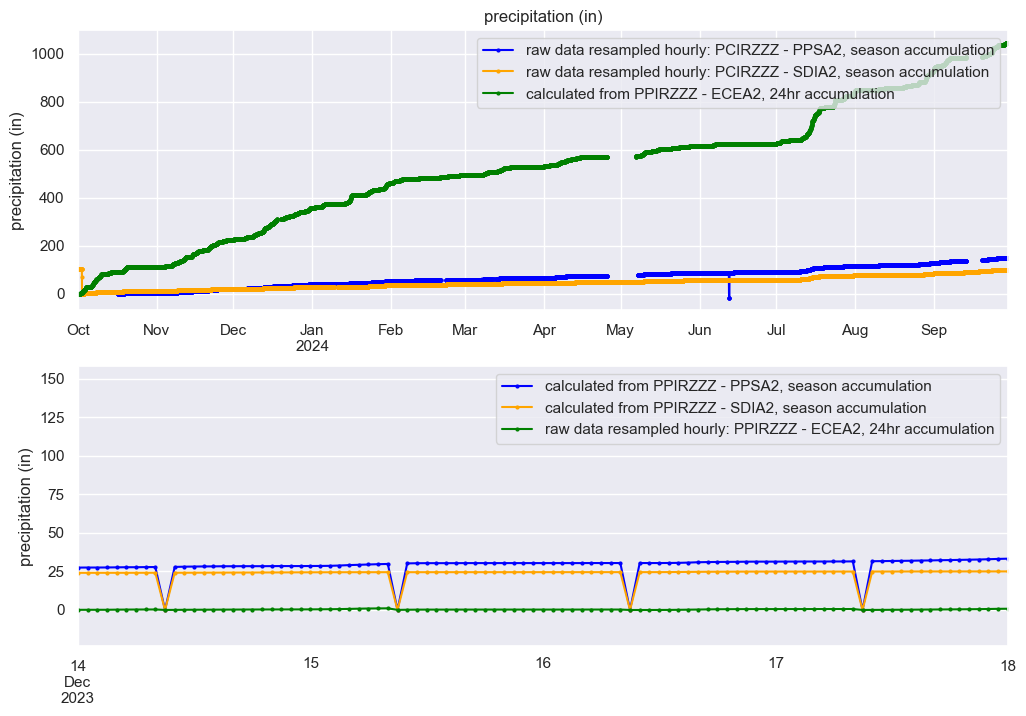

In [37]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)
# df['PCIRZZZ'].where(df['station'] == 'PPSA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - PPSA2, season accumulation')
# df['PCIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - SDIA2, season accumulation')
# df['PPIRZZZ'].where(df['station'] == 'ECEA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PPIRZZZ - ECEA2, 24hr accumulation')

precip_df['PC_PPSA2'].plot(color='blue',   ax=ax[0], marker='o', markersize=2, label='raw data resampled hourly: PCIRZZZ - PPSA2, season accumulation')
precip_df['PC_SDIA2'].plot(color='orange', ax=ax[0], marker='o', markersize=2, label='raw data resampled hourly: PCIRZZZ - SDIA2, season accumulation')
precip_df['PC_ECEA2'].plot(color='green',  ax=ax[0], marker='o', markersize=2, label='calculated from PPIRZZZ - ECEA2, 24hr accumulation')

precip_df['PP_PPSA2'].plot(color='blue',   ax=ax[1], marker='o', markersize=2, label='calculated from PPIRZZZ - PPSA2, season accumulation')
precip_df['PP_SDIA2'].plot(color='orange', ax=ax[1], marker='o', markersize=2, label='calculated from PPIRZZZ - SDIA2, season accumulation')
precip_df['PP_ECEA2'].plot(color='green',  ax=ax[1], marker='o', markersize=2, label='raw data resampled hourly: PPIRZZZ - ECEA2, 24hr accumulation')

# set titles and labels 
ax[0].set_title('precipitation (in)')
ax[0].set_ylabel('precipitation (in)')
ax[1].set_ylabel('precipitation (in)')

# zoom in the bottom plot
start_date = '2023-12-14'
end_date = '2023-12-18'

# start_date = '2023-12-14 08:00' # it looks like it starts on 09:00
# end_date = '2023-12-15 10:00'
# ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.show()


Just trying to see if .diff works...

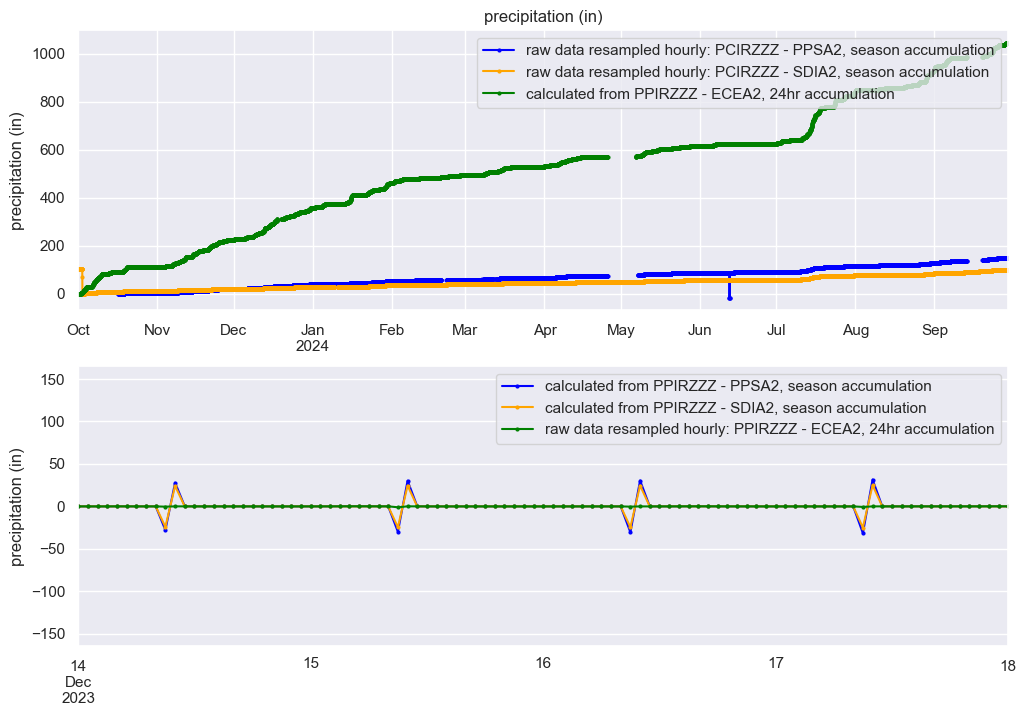

In [39]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=False)
# df['PCIRZZZ'].where(df['station'] == 'PPSA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - PPSA2, season accumulation')
# df['PCIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - SDIA2, season accumulation')
# df['PPIRZZZ'].where(df['station'] == 'ECEA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PPIRZZZ - ECEA2, 24hr accumulation')

precip_df['PC_PPSA2'].plot(color='blue',   ax=ax[0], marker='o', markersize=2, label='raw data resampled hourly: PCIRZZZ - PPSA2, season accumulation')
precip_df['PC_SDIA2'].plot(color='orange', ax=ax[0], marker='o', markersize=2, label='raw data resampled hourly: PCIRZZZ - SDIA2, season accumulation')
precip_df['PC_ECEA2'].plot(color='green',  ax=ax[0], marker='o', markersize=2, label='calculated from PPIRZZZ - ECEA2, 24hr accumulation')

precip_df['PP_PPSA2'].diff().plot(color='blue',   ax=ax[1], marker='o', markersize=2, label='calculated from PPIRZZZ - PPSA2, season accumulation')
precip_df['PP_SDIA2'].diff().plot(color='orange', ax=ax[1], marker='o', markersize=2, label='calculated from PPIRZZZ - SDIA2, season accumulation')
precip_df['PP_ECEA2'].diff().plot(color='green',  ax=ax[1], marker='o', markersize=2, label='raw data resampled hourly: PPIRZZZ - ECEA2, 24hr accumulation')

# set titles and labels 
ax[0].set_title('precipitation (in)')
ax[0].set_ylabel('precipitation (in)')
ax[1].set_ylabel('precipitation (in)')

# zoom in the bottom plot
start_date = '2023-12-14'
end_date = '2023-12-18'

# start_date = '2023-12-14 08:00' # it looks like it starts on 09:00
# end_date = '2023-12-15 10:00'
# ax[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.show()


/tmp/ipykernel_1904910/3350383944.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(loc='upper right')


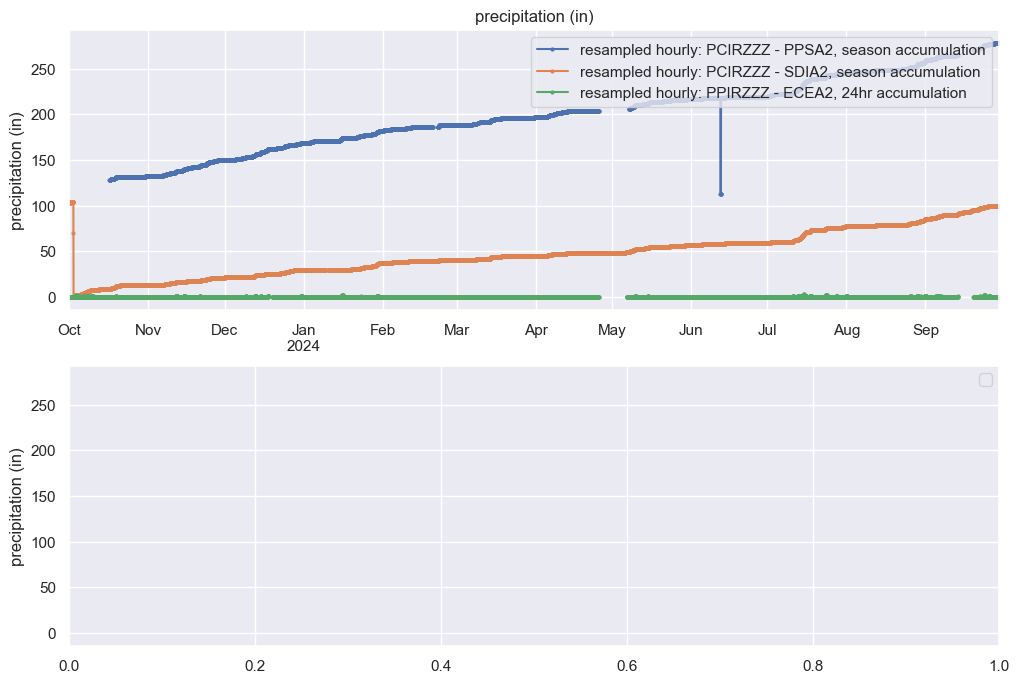

In [38]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
# df['PCIRZZZ'].where(df['station'] == 'PPSA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - PPSA2, season accumulation')
# df['PCIRZZZ'].where(df['station'] == 'SDIA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - SDIA2, season accumulation')
# df['PPIRZZZ'].where(df['station'] == 'ECEA2').resample('h').mean().plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PPIRZZZ - ECEA2, 24hr accumulation')

PC_PPSA2.plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - PPSA2, season accumulation')
PC_SDIA2.plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PCIRZZZ - SDIA2, season accumulation')
PP_ECEA2.plot(ax=ax[0], marker='o', markersize=2, label='resampled hourly: PPIRZZZ - ECEA2, 24hr accumulation')

# set titles and labels 
ax[0].set_title('precipitation (in)')
ax[0].set_ylabel('precipitation (in)')
ax[1].set_ylabel('precipitation (in)')

# zoom in the bottom plot
# start_date = '2024-01-01'
# end_date = '2024-03-01'
# start_date = '2024-01-06'
# end_date = '2024-01-08'
# ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.show()
